<a href="https://colab.research.google.com/github/ParkkaviSivakaran72/Dog-Vs-Cat-classification/blob/main/Dog_vs_Cat_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing the kaggle library
!pip install kaggle

In [2]:
#configuring the path kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

importing the dog vs cat dataset from kaggle


In [3]:
#kaggle api
!kaggle competitions download -c dogs-vs-cats

 98% 794M/812M [00:04<00:00, 334MB/s]
100% 812M/812M [00:04<00:00, 201MB/s]


In [4]:
!kaggle datasets list


ref                                                                     title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
urvishahir/electric-vehicle-specifications-dataset-2025                 Electric Vehicle Specs Dataset (2025)                    16631  2025-06-20 07:14:56.777000           4950        122  1.0              
divyaraj2006/social-media-engagement                                    social media engagement                                   2142  2025-07-02 15:34:21.323000           2053         44  1.0              
darrendube/airlinedataset                                               Airline Performance Data: FY 2022/23                      3265  2025-06-30 18:58:09.330000      

In [5]:
#extracting the zip file
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall();
  print('Successfully extracting the dataset zip file')

Successfully extracting the dataset zip file


In [6]:
#extracting the zip file
from zipfile import ZipFile

dataset = '/content/test1.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall();
  print('Successfully extracting the test data zip file')

Successfully extracting the test data zip file


In [7]:
#extracting the zip file
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall();
  print('Successfully extracting the training dataset zip file')

Successfully extracting the training dataset zip file


In [8]:
import os

#counting the files
paths,dirs,files = next(os.walk("/content/train"))

files_count = len(files)
print('images count : ',files_count)

images count :  25000


In [9]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.7107.jpg', 'cat.6263.jpg', 'dog.2175.jpg', 'dog.9552.jpg', 'dog.12445.jpg', 'dog.10021.jpg', 'dog.3548.jpg', 'dog.2319.jpg', 'cat.7594.jpg', 'dog.1485.jpg', 'cat.12306.jpg', 'dog.5821.jpg', 'dog.3780.jpg', 'dog.9249.jpg', 'dog.12138.jpg', 'dog.3192.jpg', 'cat.5057.jpg', 'cat.125.jpg', 'dog.4555.jpg', 'dog.7599.jpg', 'cat.8229.jpg', 'dog.11647.jpg', 'cat.8406.jpg', 'cat.10536.jpg', 'cat.813.jpg', 'dog.7078.jpg', 'cat.8864.jpg', 'dog.73.jpg', 'dog.3224.jpg', 'dog.2340.jpg', 'dog.8773.jpg', 'dog.11389.jpg', 'dog.7327.jpg', 'cat.1887.jpg', 'dog.10342.jpg', 'dog.11299.jpg', 'dog.8089.jpg', 'cat.12343.jpg', 'dog.12347.jpg', 'dog.11412.jpg', 'dog.7594.jpg', 'cat.5046.jpg', 'cat.8440.jpg', 'dog.6372.jpg', 'dog.460.jpg', 'cat.8781.jpg', 'cat.10011.jpg', 'cat.11206.jpg', 'dog.4416.jpg', 'dog.463.jpg', 'cat.4812.jpg', 'cat.3015.jpg', 'cat.5918.jpg', 'cat.3627.jpg', 'dog.2468.jpg', 'cat.12268.jpg', 'cat.9798.jpg', 'cat.1654.jpg', 'cat.4854.jpg', 'dog.11087.jpg', 'cat.9667.jpg', 'cat.3498.jpg

importing the dependenices

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

display the images and cats

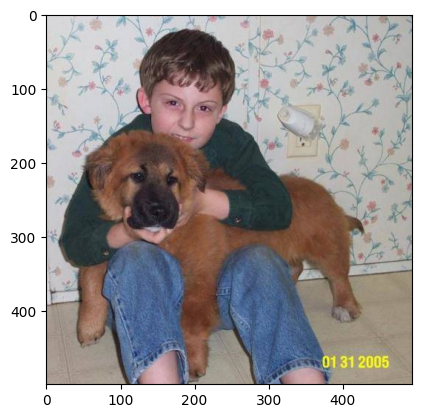

In [11]:
#display the dog image
img = mpimg.imread('/content/train/dog.4487.jpg')

img_plt = plt.imshow(img)

plt.show()

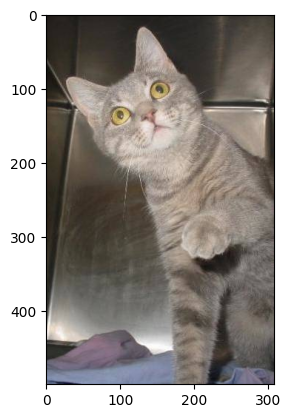

In [12]:
#display the cat image
img = mpimg.imread('/content/train/cat.4088.jpg')

img_plt = plt.imshow(img)

plt.show()

In [13]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for image in file_names:
  name = image[0:3]
  if(name == 'dog'):
    dog_count += 1
  else:
    cat_count += 1

print('Dog counts : ',dog_count)
print('Cat counts : ',cat_count)

Dog counts :  12500
Cat counts :  12500


Resizing the images


In [14]:
os.mkdir('/content/image-resized')

In [15]:
original_folder = '/content/train/'
resized_folder = '/content/image-resized/'

for i in range(2000):
  file_name = os.listdir(original_folder)[i]
  image_path = original_folder+file_name

  img = Image.open(image_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  new_path = resized_folder + file_name
  img.save(new_path)

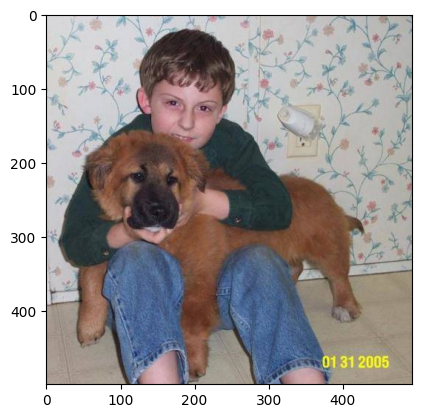

In [16]:
#display the resized dog image
img = mpimg.imread('/content/train/dog.4487.jpg')

img_plt = plt.imshow(img)

plt.show()

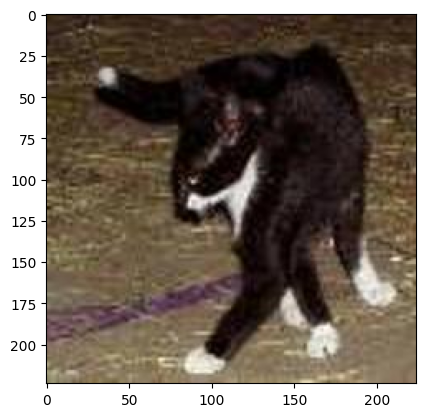

In [19]:
#display the resized cat image
img = mpimg.imread('/content/image-resized/cat.6263.jpg')

img_plt = plt.imshow(img)

plt.show()

Creating labels for rezised images of dogs and cats

In [20]:
#dog = 0
#cat = 1

In [21]:
labels = []
file_names = os.listdir('/content/image-resized')

for i in range(2000):
  file_name  = file_names[i]
  label = file_name[0:3]

  if(label == 'dog') :
    labels.append(0)
  else:
    labels.append(1)
print(labels)


[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 

In [22]:
#counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts = True)

print(values)
print(counts)

[0 1]
[1003  997]


Converting the all resized images to numpy arrays

In [23]:
import cv2
import glob

In [24]:
file_directory = '/content/image-resized/'
file_extension = ['png','jpg']

files = []

[files.extend(glob.glob(file_directory + '*.' + e)) for e in file_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [25]:
print(dog_cat_images)

[[[[  3  14  18]
   [  3  14  18]
   [  2  13  17]
   ...
   [ 99 110 118]
   [ 97 106 115]
   [ 96 105 114]]

  [[  3  14  18]
   [  3  14  18]
   [  2  13  17]
   ...
   [ 98 109 117]
   [ 96 105 114]
   [ 95 104 113]]

  [[  3  14  18]
   [  3  14  18]
   [  2  13  17]
   ...
   [ 98 109 117]
   [ 96 105 114]
   [ 95 104 113]]

  ...

  [[ 12  24  34]
   [ 10  22  32]
   [  6  21  30]
   ...
   [169 188 196]
   [162 181 189]
   [158 177 185]]

  [[  7  20  28]
   [  5  18  26]
   [  3  16  24]
   ...
   [168 187 195]
   [160 179 187]
   [155 174 182]]

  [[ 10  24  30]
   [  8  22  28]
   [  7  20  28]
   ...
   [165 184 192]
   [155 174 182]
   [148 167 175]]]


 [[[ 25  46  61]
   [ 24  45  60]
   [ 23  44  59]
   ...
   [ 41  53  71]
   [ 34  46  64]
   [ 29  41  59]]

  [[ 19  40  55]
   [ 20  41  56]
   [ 21  42  57]
   ...
   [ 35  47  65]
   [ 31  43  61]
   [ 27  39  57]]

  [[ 13  34  49]
   [ 15  36  51]
   [ 20  39  54]
   ...
   [ 23  35  53]
   [ 21  33  51]
   [ 20  32

In [26]:
type(dog_cat_images)

numpy.ndarray

In [27]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [28]:
X = dog_cat_images
Y = np.asarray(labels)

Training the model

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [30]:
#scaling the data
X_train_scaled = X_train / 255

X_test_scaled = X_test / 255

In [31]:
print(X_train_scaled)

[[[[0.01176471 0.05490196 0.07058824]
   [0.01176471 0.05490196 0.07058824]
   [0.00784314 0.05098039 0.06666667]
   ...
   [0.38823529 0.43137255 0.4627451 ]
   [0.38039216 0.41568627 0.45098039]
   [0.37647059 0.41176471 0.44705882]]

  [[0.01176471 0.05490196 0.07058824]
   [0.01176471 0.05490196 0.07058824]
   [0.00784314 0.05098039 0.06666667]
   ...
   [0.38431373 0.42745098 0.45882353]
   [0.37647059 0.41176471 0.44705882]
   [0.37254902 0.40784314 0.44313725]]

  [[0.01176471 0.05490196 0.07058824]
   [0.01176471 0.05490196 0.07058824]
   [0.00784314 0.05098039 0.06666667]
   ...
   [0.38431373 0.42745098 0.45882353]
   [0.37647059 0.41176471 0.44705882]
   [0.37254902 0.40784314 0.44313725]]

  ...

  [[0.04705882 0.09411765 0.13333333]
   [0.03921569 0.08627451 0.1254902 ]
   [0.02352941 0.08235294 0.11764706]
   ...
   [0.6627451  0.7372549  0.76862745]
   [0.63529412 0.70980392 0.74117647]
   [0.61960784 0.69411765 0.7254902 ]]

  [[0.02745098 0.07843137 0.10980392]
   [0.0

Building the neural network


In [32]:
import tensorflow as tf
import tensorflow_hub as hub

In [33]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pre_trained_model = hub.KerasLayer(mobilenet_model, input_shape = (224,224,3), trainable = False)

In [34]:
!pip install tf_keras
import tf_keras

In [36]:
num_of_classes = 2

model = tf_keras.Sequential([

    pre_trained_model,
    tf_keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [46]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)


In [47]:
model.fit(X_train_scaled, Y_train,epochs = 5)

Epoch 1/5
50/50 [==============================] - 54s 968ms/step - loss: 0.2189 - acc: 0.9038
Epoch 2/5
50/50 [==============================] - 52s 1s/step - loss: 0.0714 - acc: 0.9769
Epoch 3/5
50/50 [==============================] - 52s 1s/step - loss: 0.0527 - acc: 0.9850
Epoch 4/5
50/50 [==============================] - 52s 1s/step - loss: 0.0414 - acc: 0.9862
Epoch 5/5
50/50 [==============================] - 51s 1s/step - loss: 0.0322 - acc: 0.9912


In [48]:
score, accuracy = model.evaluate(X_test_scaled, Y_test )
print('Score : ',score)
print('Accuracy : ',accuracy)

13/13 [==============================] - 15s 1s/step - loss: 0.1055 - acc: 0.9725
Score :  0.10550221800804138
Accuracy :  0.9725000262260437


Path of the image to be predicted /content/cat.jpg


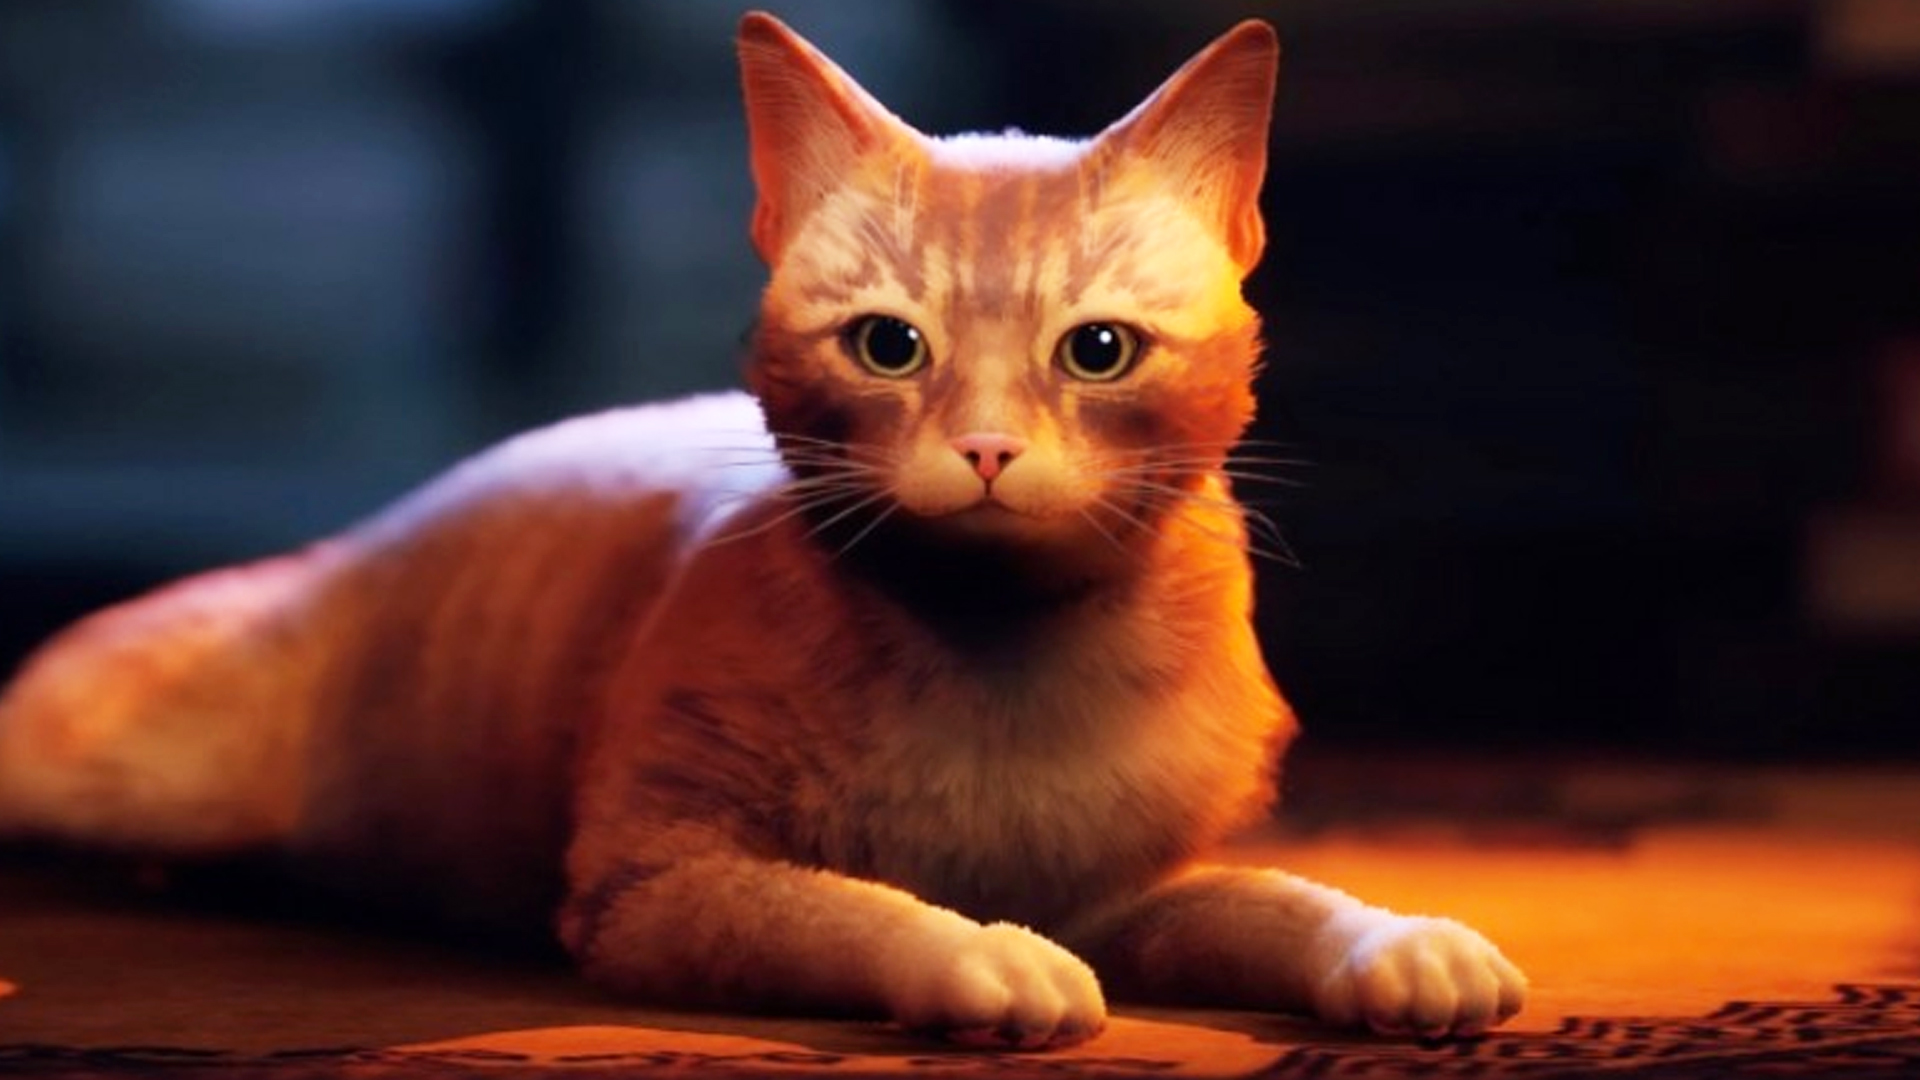

1/1 [==============================] - 0s 80ms/step
The image represents a Cat


In [53]:
input_image_path = input('Path of the image to be predicted ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize / 255
image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print("The image represents a Dog")
else:
  print("The image represents a Cat")

Path of the image to be predicted /content/dog.jpg


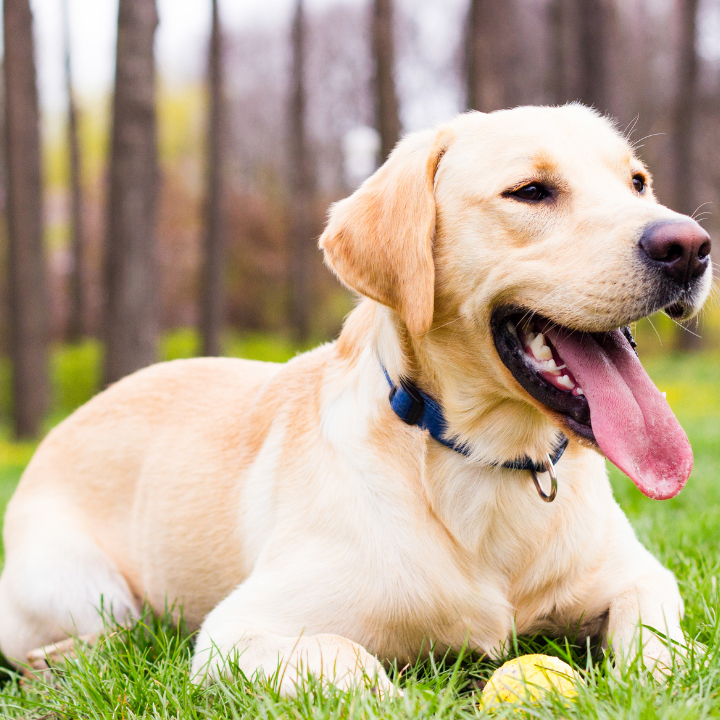

1/1 [==============================] - 0s 65ms/step
The image represents a Dog


In [52]:
input_image_path = input('Path of the image to be predicted ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize / 255
image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print("The image represents a Dog")
else:
  print("The image represents a Cat")